## Exercise: Reading simulation data files


In this case we will analyse data produced by a simulation of a spherical cloud interacting with a wind, which is represented by a constant velocity field.

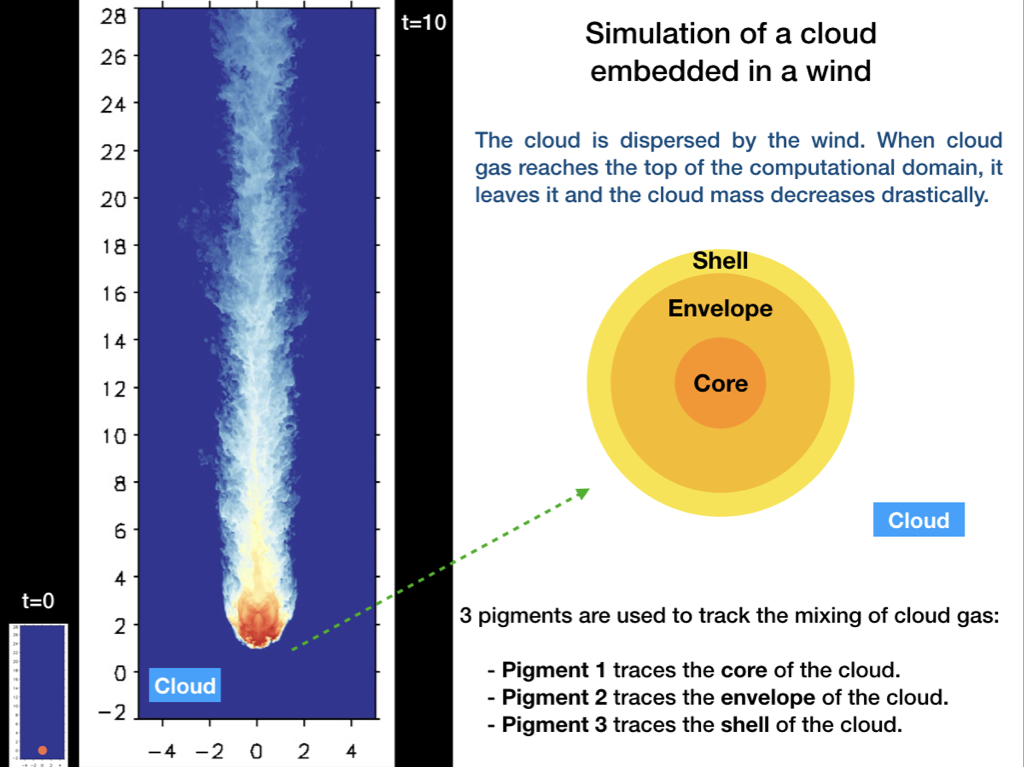


A movie of the simulation can be found here:
https://github.com/wbandabarragan/computational-physics-1/blob/main/unit-1/3Dunifr.mov

The wind disperses the cloud, which becomes elongated like a filament. As the simulation evolves cloud material flows off the computational domain, and towards the end of the simulation, cloud material is almost absent in the domain.

To understand how mass is removed from the cloud, we can calculate some diagnostics, e.g.:

1. The cloud mass inside the computational domain (Mass1)
2. The mass flux of cloud gas crossing half of the simulation domain (FluxE).
3. The mass flux of cloud gas crossing the back side of the simulation domain (FluxH).

The file **data_1.dat** contains these quantities, so we are going to do some data analysis.

In [18]:
import numpy as np

import matplotlib.pyplot as plt

In [19]:
# First we open the file and read what is inside

file = open("data_1.dat", "r")

data = file.read()

file.close()

In [20]:
# Check
#print(data)

In [21]:
# Let's not out the data into lists

file = open("data_1.dat", "r")

data = file.readlines()

# Define empty lists
c_0 = []
c_1 = []
c_2 = []
c_3 = []

# Do a for loop
for j in data[1:]: # Avoid header, so we start in 1
    numbers = j.split()
    c_0.append(numbers[0])
    c_1.append(numbers[1])
    c_2.append(numbers[2])
    c_3.append(numbers[3])

file.close()

# Pass the lists to arrays

c_0r = np.array(c_0, dtype = float) # Time
c_1r = np.array(c_1, dtype = float) # Mass
c_2r = np.array(c_2, dtype = float) # Flux through half the box
c_3r = np.array(c_3, dtype = float) # Flux through back side of the box

In [22]:
# safe check
#print(c_0r.size, c_1r.size, c_2r.size, c_3r.size)

#print(c_1r)

# Plot of cloud mass vs. time

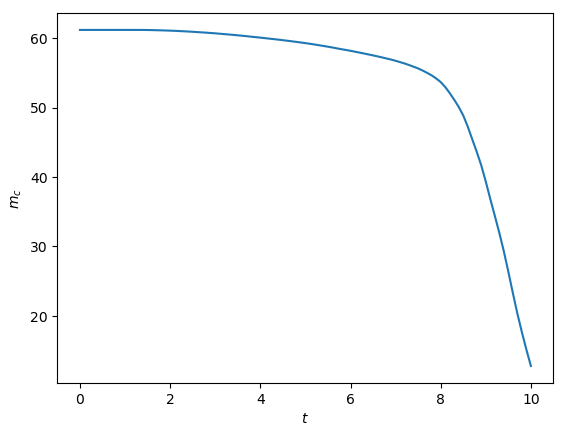

In [25]:
# Figure environment

plt.figure()

plt.plot(c_0r, c_1r)

plt.xlabel(r"$t$")
plt.ylabel(r"$m_c$")

plt.show()

# Plot of flux through half of the domain vs. time

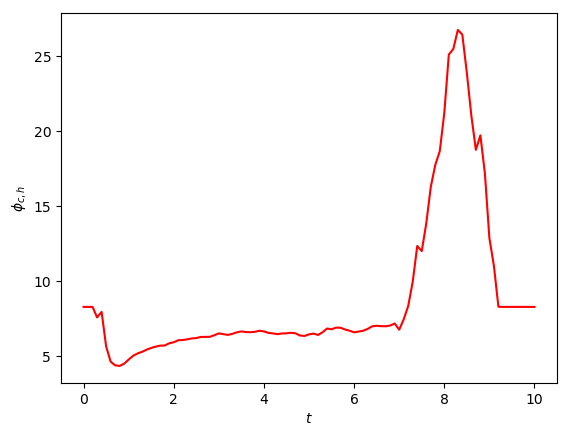

In [30]:
# Figure environment

plt.figure()

plt.plot(c_0r, c_2r, color = "red")

plt.xlabel(r"$t$")
plt.ylabel(r"$\phi_{c, h}$")

plt.show()

# Plot of flux through the back of the domain vs. time

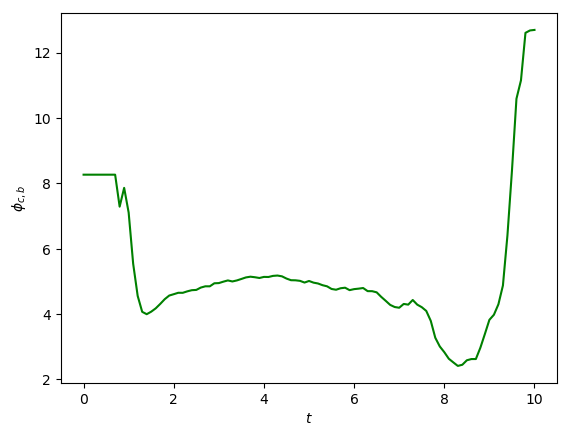

In [29]:
# Figure environment

plt.figure()

plt.plot(c_0r, c_3r, color = "green")

plt.xlabel(r"$t$")
plt.ylabel(r"$\phi_{c, b}$")

plt.show()

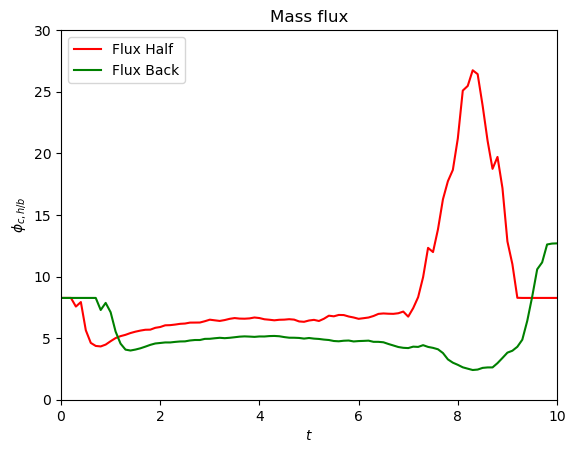

In [36]:
# Joint plot

# Figure environment

plt.figure()

plt.title("Mass flux")

plt.plot(c_0r, c_2r, color = "red", label = "Flux Half")
plt.plot(c_0r, c_3r, color = "green", label = "Flux Back")

plt.xlabel(r"$t$")
plt.ylabel(r"$\phi_{c, h/b}$")

plt.xlim(0, 10)
plt.ylim(0, 30)

plt.legend(loc = 0)

plt.show()